# OpsFree Data Science Assignment

submitted by :
\
Sabhavath Yashwanth
\
yashwanthsabhavath98.8@gmail.com
\
9441681145

### INDEX
- 1. BASIC CHECKS
- 2. Data Preprocesing
- 3. Handling Missing Values
- 4. Identify and remove Outliers  (using LocalOutlierFactor funtion)
- 5. Exploratory Data Analysis  

          - Univariate visualizations
          - Bivariate visualizations
          - One-Hot encoding
          - Identifying Outliers using Z-score, IQR (statistical methods)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\SEMESTERS\All_DS Projects\ALL DATASETS HERE\traces_data.csv")

In [3]:
# # to see the first five rows
df.head(5)

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,protocol
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


### Domain Analysis of Trace Microservices

- Timestamp: Time of occurrence of the event
- TraceID: A unique identifier for the entire trace.
- SpanID: A unique identifier for the current span.
- ParentSpanID: The SpanID of the parent span.
- Service Name: The name of the service that the span is associated with.
- Name: The specific operation or endpoint being traced.
- Duration: The time taken for the operation, in microseconds.

Same TraceID: Indicates the spans are part of the same request or transaction, helping in building a comprehensive trace of the request's path through the system.
\
Different TraceIDs: Indicates separate, independent requests or transactions. Each TraceID is unique to a single trace, representing a distinct workflow or process.
\
A parent span might represent a high-level operation that consists of multiple sequential steps, each captured by a different span. These child spans will have different spanIDs but the same parentSpanID.

#### Basic Checks

In [4]:
# to see the first five rows
df.head(5)

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,protocol
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


In [5]:
# to see the bottom 5 rows
df.tail(5)

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,protocol
183609,44:52.0,cc3f285a2ef094d4ba7582b1d5d47882,ebf0df7adc41ca4d,53e18cd5258047f5,recommendationservice,/oteldemo.ProductCatalogService/ListProducts,1016311,grpc
183610,44:54.1,be4a70fee4913f3cf56b1c64228bcdb5,0975afe20d7368d2,7a1c6f8d9bff070f,currencyservice,CurrencyService/Convert,34953,grpc
183611,44:54.1,be4a70fee4913f3cf56b1c64228bcdb5,96139b9d0d16639a,8f0b4f79ec0d0005,currencyservice,CurrencyService/Convert,25660,grpc
183612,44:54.1,be4a70fee4913f3cf56b1c64228bcdb5,b1321d3db08e86d3,73e8e9281d421a7d,quoteservice,calculate-quote,5401,NaN
183613,44:54.1,be4a70fee4913f3cf56b1c64228bcdb5,ae64d281880bfed7,2f7d3638d3ad3342,currencyservice,CurrencyService/Convert,30845,grpc


In [6]:
# to see the number of rows and columns
df.shape

(183614, 8)

In [7]:
# to see all the columns
df.columns

Index(['Timestamp', ' traceID', ' spanID', ' parentSpanID', ' serviceName',
       ' Name', ' durationNano', 'protocol'],
      dtype='object')

In [8]:
df.dtypes

Timestamp        object
 traceID         object
 spanID          object
 parentSpanID    object
 serviceName     object
 Name            object
 durationNano     int64
protocol         object
dtype: object

In [9]:
df.describe()

,durationNano
count,1.836140e+05
mean,5.414762e+06
std,2.077874e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584901e+06
75%,6.832380e+06
max,4.999858e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183614 entries, 0 to 183613
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Timestamp      183614 non-null  object
 1    traceID       183614 non-null  object
 2    spanID        183614 non-null  object
 3    parentSpanID  141833 non-null  object
 4    serviceName   183614 non-null  object
 5    Name          183614 non-null  object
 6    durationNano  183614 non-null  int64 
 7   protocol       80497 non-null   object
dtypes: int64(1), object(7)
memory usage: 11.2+ MB


#### Data Preprocesing

In [11]:
# check the null value present in the data
df.isnull().sum()

Timestamp             0
 traceID              0
 spanID               0
 parentSpanID     41781
 serviceName          0
 Name                 0
 durationNano         0
protocol         103117
dtype: int64

<Axes: >

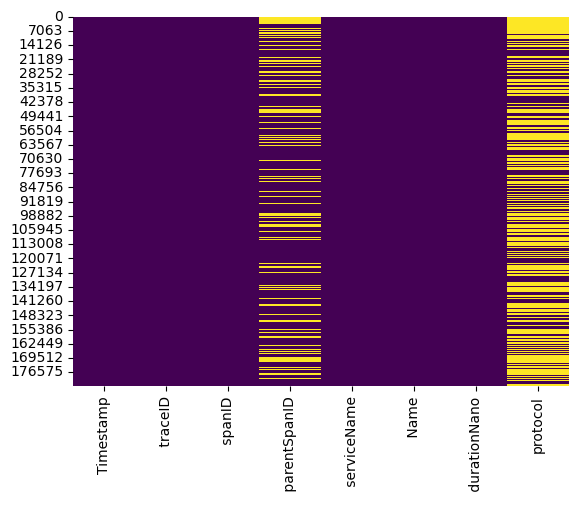

In [12]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

#### Unique values and value counts

In [13]:
# check for the unique values and count them
df['Timestamp'].unique()
df['Timestamp'].value_counts()

34:56.1    2053
34:48.9    1322
03:19.6     178
21:55.0     168
35:54.0     160
           ... 
46:07.2       1
46:04.2       1
46:03.6       1
26:11.9       1
45:08.7       1
Name: Timestamp, Length: 14189, dtype: int64

In [14]:
# check for the unique values and count them
df[' traceID'].unique()
df[' traceID'].value_counts()

1f2fae8467906870310cea93db646b1b    62
baf28a33f67b3fdc32a23efc21ebe1ca    62
1a22bbee3f36988839bd3a3942702489    62
61e54cdbd7d9de6aa0208c2cc5953564    62
149a8568251d5fe3a3063325a295d449    62
                                    ..
f0e1817ed4f9b6a55cc562663cadce94     1
42c2ff9c6dbc49086f2b167aebe3763c     1
52249464b186bf19c41ae4ce8c59f374     1
7a9e56b233c638a999c571f02267e713     1
067f3d281447b5b3773e7d70ede6a0b5     1
Name:  traceID, Length: 41792, dtype: int64

In [15]:
# check for the unique values and count them
df[' spanID'].unique()
df[' spanID'].value_counts()

0d87dcf5ea5aeaab    1
ed13885daefc12ba    1
cdcf63650f7f82c6    1
51b6a11a8d33f7ba    1
08ce7a85a111640d    1
                   ..
c8c5d5c5f1839549    1
24f249ed9461220e    1
ed7c8fa3c0227642    1
de5501d92c145cdf    1
ae64d281880bfed7    1
Name:  spanID, Length: 183614, dtype: int64

In [16]:
# check for the unique values and count them
df[' parentSpanID'].unique()
df[' parentSpanID'].value_counts()

d1783a9be93930b7    59
d7d27bf87b2ccf8b    19
db11eaa9e76ff8aa    17
f3412f1331a5a182    11
f8990196061820a1    11
                    ..
5af930f24ae858d9     1
ccda23ec9696b657     1
bcd1a97fb3161999     1
151e34f4ab9bc315     1
2f7d3638d3ad3342     1
Name:  parentSpanID, Length: 107233, dtype: int64

In [17]:
# check for the unique values and count them
df[' serviceName'].unique()
df[' serviceName'].value_counts()

frontend                 65757
cartservice              25834
productcatalogservice    20934
loadgenerator            16852
checkoutservice          13750
featureflagservice        7623
recommendationservice     6032
frontend-proxy            4836
emailservice              4016
adservice                 3523
paymentservice            3337
shippingservice           3012
quoteservice              3010
currencyservice           2860
accountingservice         1004
frauddetectionservice     1004
frontend-web               230
Name:  serviceName, dtype: int64

In [18]:
# check for the unique values and count them
df[' Name'].unique()
df[' Name'].value_counts()

HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name:  Name, Length: 66, dtype: int64

In [19]:
# check for the unique values and count them
df[' durationNano'].unique()
df[' durationNano'].value_counts()

2816        124
4352        112
3072        112
4096        104
7936         97
           ... 
1572027       1
18893502      1
25780185      1
34851584      1
30845         1
Name:  durationNano, Length: 126243, dtype: int64

In [20]:
# check for the unique values and count them
df['protocol'].unique()
df['protocol'].value_counts()

grpc    80497
Name: protocol, dtype: int64

### Handling Missing Values

In [21]:
# drop the entire protocol column as it contains only one distinct value ("gRPC") and many rows are left empty and may not be 
# that much usefull for our analysis
df.drop(columns=['protocol'], inplace=True)

In [22]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [23]:
# Fill missing parentSpanID values with 'root' for root spans (as root spans that do not have a parentSpanID for 1st sequential traceID iteration)
df[' parentSpanID'].fillna('root', inplace=True)

In [24]:
df.head(10)

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,root,featureflagservice,/,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,root,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,root,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,root,frontend-proxy,ingress,556000
5,42:42.9,f086ac82b8d7a9590cdd1b6abffed617,871279d818be6b34,root,frontend-proxy,ingress,606000
6,42:45.9,3a4688bac6c7275e22e98cea542bedaf,4d80902351506947,root,frontend-proxy,ingress,615000
7,42:48.9,c7dd2f62816aaa96577cb3a7906c9d6e,3ac29927bd1ba449,root,frontend-proxy,ingress,560000
8,42:51.9,28280ce792a326ae400364627a7e15f1,aab0792785736c86,root,frontend-proxy,ingress,564000
9,42:54.9,bb59d1aabf69143849c35934d22cc585,bb23c86be6b1f497,root,frontend-proxy,ingress,544000


In [25]:
df.isnull().sum()

Timestamp        0
 traceID         0
 spanID          0
 parentSpanID    0
 serviceName     0
 Name            0
 durationNano    0
dtype: int64

<Axes: >

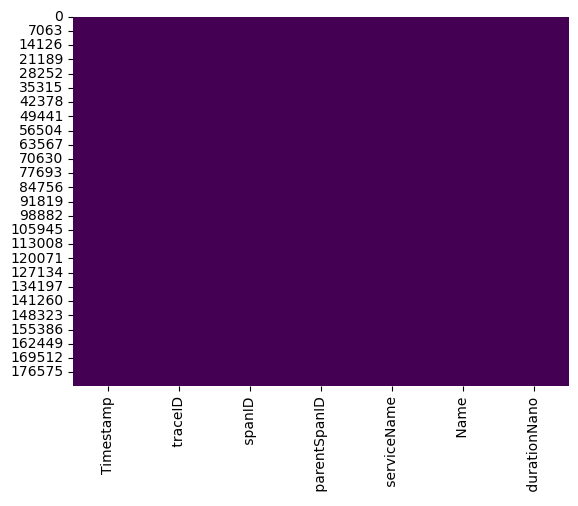

In [26]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [27]:
# Count the occurrences of '/' in each entry of the 'Name' column
slash_count = df[' Name'].str.count('/')

# Sum the counts to get the total number of occurrences of '/'
total_slash_count = slash_count.sum()

print(f"Total number of '/' occurrences: {total_slash_count}")

Total number of '/' occurrences: 94355


In [28]:
# Count the occurrences of '/' in each entry of the 'span_name' column
slash_count = df[' Name'].str.count('ingress')

# Sum the counts to get the total number of occurrences of '/'
total_slash_count = slash_count.sum()

print(f"Total number of 'ingress' occurrences: {total_slash_count}")

Total number of 'ingress' occurrences: 4836


In [29]:
# Count the occurrences of '/' in each entry of the 'span_name' column
slash_count = df[' Name'].str.count('featureflagservice.repo.query:featureflags')

# Sum the counts to get the total number of occurrences of '/'
total_slash_count = slash_count.sum()

print(f"Total number of 'featureflagservice.repo.query:featureflags' occurrences: {total_slash_count}")

Total number of 'featureflagservice.repo.query:featureflags' occurrences: 3809


In [30]:
# Filter rows containing '/' in the 'Name' column
slash_rows = df[df[' Name'].str.contains('/')]

# Display the filtered rows
print("Rows containing '/':\n", slash_rows)

Rows containing '/':
        Timestamp                           traceID            spanID  \
0        42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
12       43:02.9  ddecc69963a93a81748ac538f34d5f48  63f4a48ba5e06cfc   
25       43:33.0  a860bb63ebeb1b81d9bfa3f82bfa098d  a9b4e75286a4a5fc   
37       44:03.1  28a6a47197ad19dad238f65bcd470027  f166397807ed7d8b   
50       44:33.2  c3c886bd72cc247abc69f0c42b8ac0b7  fb87cf361a0422ba   
...          ...                               ...               ...   
183608   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  f991a48b5c28146e   
183609   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  ebf0df7adc41ca4d   
183610   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  0975afe20d7368d2   
183611   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  96139b9d0d16639a   
183613   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  ae64d281880bfed7   

            parentSpanID            serviceName  \
0                   root     featureflagservice   
12         

In [31]:
# Conclusion: If the ParentSpanID is the root or 1st iteration call then the Name of this service is represented as '/'
# No replace '/' with 'root_endpoint' for better readability of the data

df[' Name'] = df[' Name'].replace('/', 'root_endpoint')

In [32]:
# print unique values of Name column
df[' Name'].unique()

array(['root_endpoint', 'featureflagservice.repo.query:featureflags',
       'ingress', 'fs realpathSync', 'fs readFileSync', 'fs statSync',
       'HTTP GET', 'oteldemo.ProductCatalogService/GetProduct',
       'HTTP POST', '/oteldemo.RecommendationService/ListRecommendations',
       'get_product_list', '/oteldemo.FeatureFlagService/GetFlag',
       '/oteldemo.ProductCatalogService/ListProducts',
       'oteldemo.CartService/AddItem',
       'oteldemo.ProductCatalogService/ListProducts', 'HGET', 'HMSET',
       'EXPIRE', 'grpc.oteldemo.CartService/GetCart',
       'oteldemo.CartService/GetCart',
       'grpc.oteldemo.ProductCatalogService/GetProduct',
       'oteldemo.FeatureFlagService/GetFlag',
       'grpc.oteldemo.CartService/AddItem',
       'grpc.oteldemo.CheckoutService/PlaceOrder', 'dns.lookup',
       'tcp.connect', 'oteldemo.CheckoutService/PlaceOrder',
       'prepareOrderItemsAndShippingQuoteFromCart',
       'oteldemo.CurrencyService/Convert', 'CurrencyService/Convert',


In [33]:
df[' Name'].value_counts()

HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name:  Name, Length: 66, dtype: int64

In [34]:
# df.drop(columns=['slash_count'], inplace=True)
df.rename(columns={' traceID':'traceID', ' spanID':'spanID', ' parentSpanID':'parentSpanID', ' serviceName':'serviceName',' Name':'operationName', ' durationNano':'durationNano'}, inplace=True)
df.head(10)

,Timestamp,traceID,spanID,parentSpanID,serviceName,operationName,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,root,featureflagservice,root_endpoint,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,root,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,root,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,root,frontend-proxy,ingress,556000
5,42:42.9,f086ac82b8d7a9590cdd1b6abffed617,871279d818be6b34,root,frontend-proxy,ingress,606000
6,42:45.9,3a4688bac6c7275e22e98cea542bedaf,4d80902351506947,root,frontend-proxy,ingress,615000
7,42:48.9,c7dd2f62816aaa96577cb3a7906c9d6e,3ac29927bd1ba449,root,frontend-proxy,ingress,560000
8,42:51.9,28280ce792a326ae400364627a7e15f1,aab0792785736c86,root,frontend-proxy,ingress,564000
9,42:54.9,bb59d1aabf69143849c35934d22cc585,bb23c86be6b1f497,root,frontend-proxy,ingress,544000


### DataTypes and Conversion

In [35]:
# Convert categorical columns to 'category' dtype
categorical_columns = ['serviceName', 'operationName', 'traceID', 'spanID', 'parentSpanID']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [36]:
df.dtypes

Timestamp          object
traceID          category
spanID           category
parentSpanID     category
serviceName      category
operationName    category
durationNano        int64
dtype: object

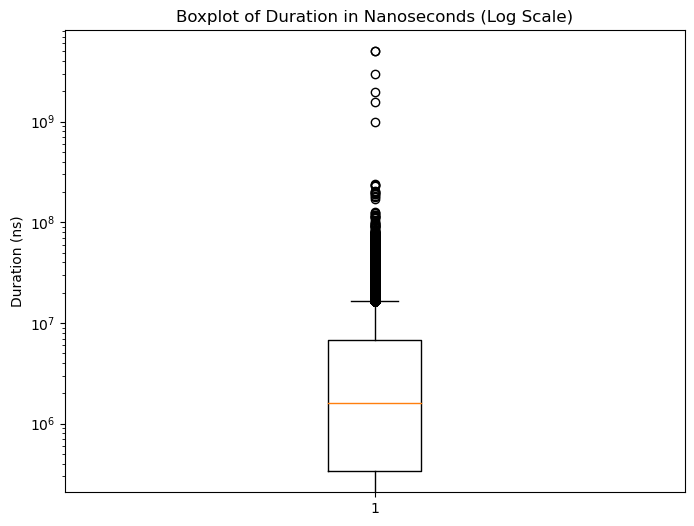

In [37]:
# visualizing outliers through boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['durationNano'])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Boxplot of Duration in Nanoseconds (Log Scale)')
plt.ylabel('Duration (ns)')
plt.show()

### Identifying Outliers using Local Outlier Factor (LOF) in the durationNano Column

In [38]:
from sklearn.neighbors import LocalOutlierFactor

# Reshape the 'durationNano' column to be a 2D array
duration_2d = df['durationNano'].values.reshape(-1, 1)

# Apply LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['outlier'] = lof.fit_predict(duration_2d)

# Display the DataFrame with the outliers column
print(df)

# -1 for outliers, 1 for inliers

       Timestamp                           traceID            spanID  \
0        42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1        42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2        42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3        42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4        42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   
...          ...                               ...               ...   
183609   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  ebf0df7adc41ca4d   
183610   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  0975afe20d7368d2   
183611   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  96139b9d0d16639a   
183612   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  b1321d3db08e86d3   
183613   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  ae64d281880bfed7   

            parentSpanID            serviceName  \
0                   root     featureflagservice   
1       0d87dcf5ea5aeaab     feat

In [39]:
count_of_1s_filter = df[df['outlier'] == 1]['outlier'].count()
print("Count of 1s using filtering and count:", count_of_1s_filter)

Count of 1s using filtering and count: 181777


In [40]:
count_of_1s_filter = df[df['outlier'] == -1]['outlier'].count()
print("Count of -1s using filtering and count:", count_of_1s_filter)

Count of -1s using filtering and count: 1837


In [41]:
# remove outliers from the dataset
df = df[df['outlier'] != -1]

In [42]:
df.drop(columns=['outlier'], inplace=True)
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,operationName,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,root,featureflagservice,root_endpoint,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,root,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,root,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,root,frontend-proxy,ingress,556000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181777 entries, 0 to 183613
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Timestamp      181777 non-null  object  
 1   traceID        181777 non-null  category
 2   spanID         181777 non-null  category
 3   parentSpanID   181777 non-null  category
 4   serviceName    181777 non-null  category
 5   operationName  181777 non-null  category
 6   durationNano   181777 non-null  int64   
dtypes: category(5), int64(1), object(1)
memory usage: 18.2+ MB


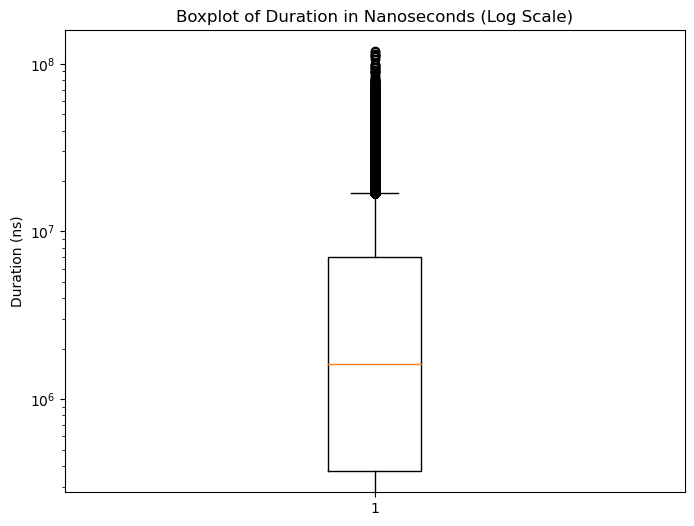

In [44]:
# visualizing outliers through boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['durationNano'])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Boxplot of Duration in Nanoseconds (Log Scale)')
plt.ylabel('Duration (ns)')
plt.show()

## Exploratory Data Analysis

### 1. Univariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'accountingservice'),
  Text(1, 0, 'adservice'),
  Text(2, 0, 'cartservice'),
  Text(3, 0, 'checkoutservice'),
  Text(4, 0, 'currencyservice'),
  Text(5, 0, 'emailservice'),
  Text(6, 0, 'featureflagservice'),
  Text(7, 0, 'frauddetectionservice'),
  Text(8, 0, 'frontend'),
  Text(9, 0, 'frontend-proxy'),
  Text(10, 0, 'frontend-web'),
  Text(11, 0, 'loadgenerator'),
  Text(12, 0, 'paymentservice'),
  Text(13, 0, 'productcatalogservice'),
  Text(14, 0, 'quoteservice'),
  Text(15, 0, 'recommendationservice'),
  Text(16, 0, 'shippingservice')])

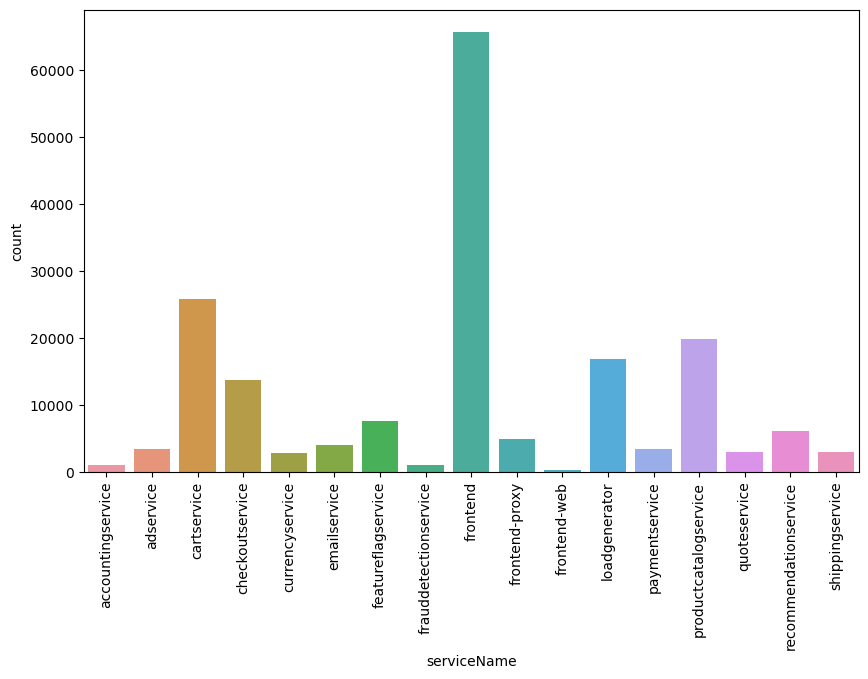

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='serviceName', data=df)
plt.xticks(rotation=90)

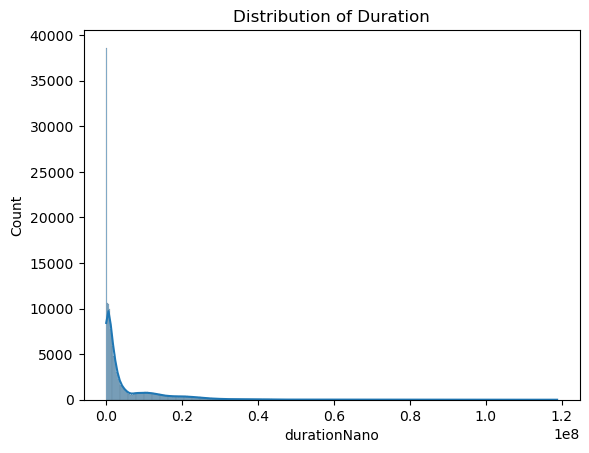

In [46]:
# Distribution of Duration
sns.histplot(df['durationNano'], kde=True)
plt.title('Distribution of Duration')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '/featureflags'),
  Text(1, 0, '/featureflags/:id'),
  Text(2, 0, '/featureflags/:id/edit'),
  Text(3, 0, '/oteldemo.FeatureFlagService/GetFlag'),
  Text(4, 0, '/oteldemo.ProductCatalogService/ListProducts'),
  Text(5, 0, '/oteldemo.RecommendationService/ListRecommendations'),
  Text(6, 0, 'CurrencyService/Convert'),
  Text(7, 0, 'CurrencyService/GetSupportedCurrencies'),
  Text(8, 0, 'EXPIRE'),
  Text(9, 0, 'HGET'),
  Text(10, 0, 'HMSET'),
  Text(11, 0, 'HTTP GET'),
  Text(12, 0, 'HTTP POST'),
  Text(13, 0, 'POST /getquote'),
  Text(14, 0, 'POST /send_order_confirmation'),
  Text(15, 0, 'calculate-quote'),
  Text(16, 0, 'charge'),
  Text(17, 0, 'click'),
  Text(18, 0, 'dns.lookup

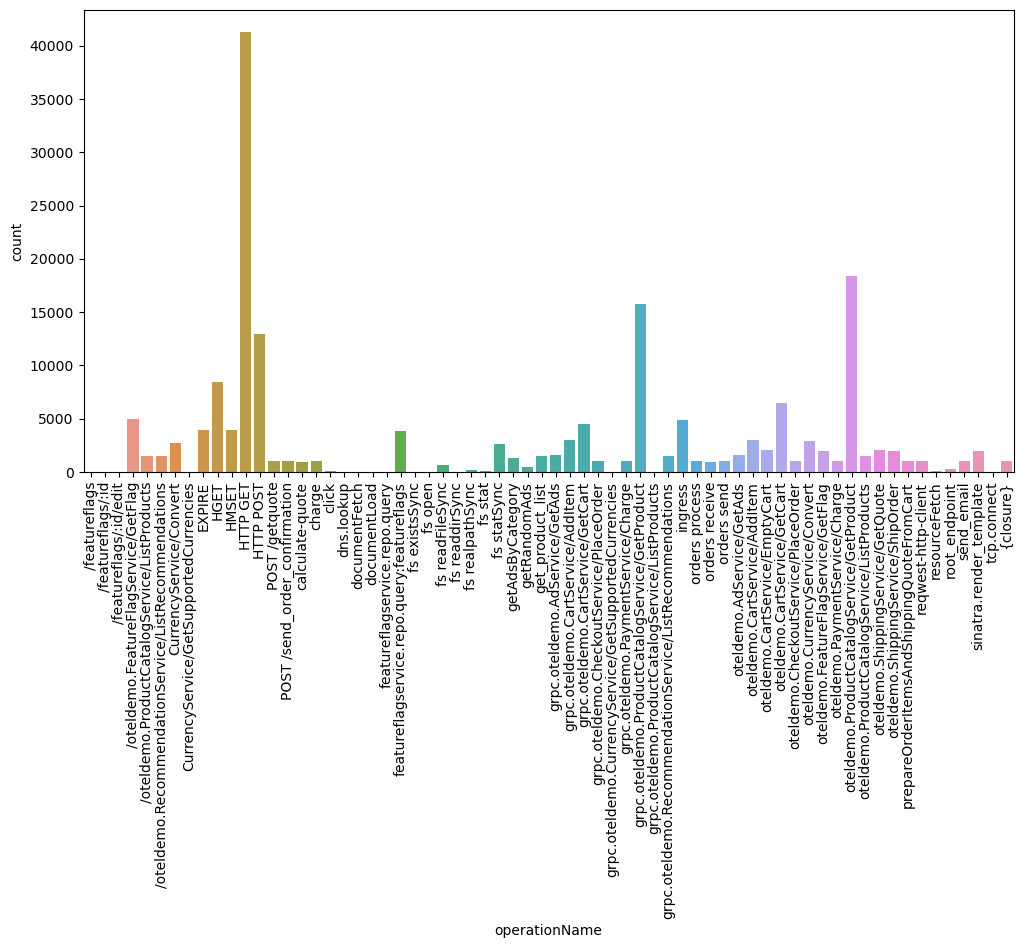

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='operationName', data=df)
plt.xticks(rotation=90)

### One-hot encoding

In [48]:
# Perform one-hot encoding on 'serviceName' column
df1 = pd.get_dummies(df['serviceName'], drop_first=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data1 = pd.concat([df, df1], axis=1).drop(['serviceName'], axis=1)

In [49]:
data1.head()

,Timestamp,traceID,spanID,parentSpanID,operationName,durationNano,adservice,cartservice,checkoutservice,currencyservice,...,frauddetectionservice,frontend,frontend-proxy,frontend-web,loadgenerator,paymentservice,productcatalogservice,quoteservice,recommendationservice,shippingservice
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,root,root_endpoint,887477,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice.repo.query:featureflags,481634,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,root,ingress,213000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,root,ingress,602000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,root,ingress,556000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Bivariate Analysis

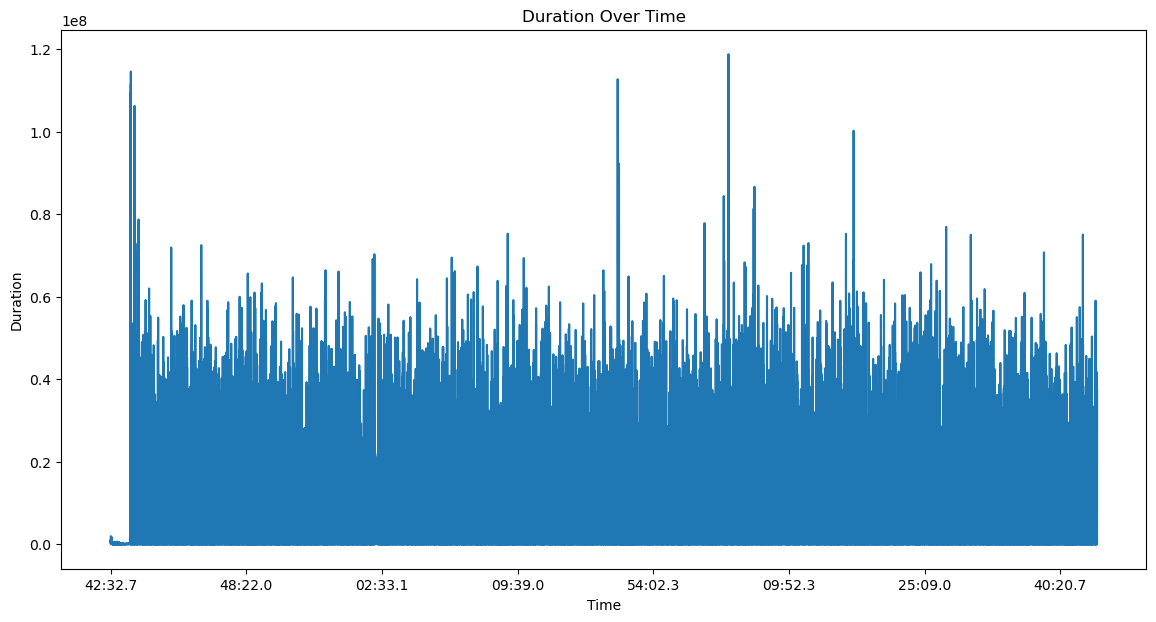

In [50]:
# plotting Duration over Time
plt.figure(figsize=(14, 7))
df.set_index('Timestamp')['durationNano'].plot()
plt.title('Duration Over Time')
plt.xlabel('Time')
plt.ylabel('Duration')
plt.show()

In [51]:
# relationship between Service Names and Duration
data1.corr()

,durationNano,adservice,cartservice,checkoutservice,currencyservice,emailservice,featureflagservice,frauddetectionservice,frontend,frontend-proxy,frontend-web,loadgenerator,paymentservice,productcatalogservice,quoteservice,recommendationservice,shippingservice
durationNano,1.000000,-0.064689,-0.228550,-0.043462,-0.078399,-0.078975,-0.107302,-0.046023,0.133320,0.008670,0.029853,0.483444,-0.086128,-0.149793,-0.071506,0.096463,-0.059634
adservice,-0.064689,1.000000,-0.056190,-0.039513,-0.016994,-0.020503,-0.028896,-0.010207,-0.103981,-0.022833,-0.004906,-0.044147,-0.018888,-0.048237,-0.017626,-0.025589,-0.017694
cartservice,-0.228550,-0.056190,1.000000,-0.116343,-0.050039,-0.060370,-0.085082,-0.030054,-0.306161,-0.067230,-0.014446,-0.129986,-0.055615,-0.142030,-0.051899,-0.075343,-0.052098
checkoutservice,-0.043462,-0.039513,-0.116343,1.000000,-0.035187,-0.042453,-0.059830,-0.021134,-0.215294,-0.047277,-0.010159,-0.091407,-0.039109,-0.099876,-0.036496,-0.052982,-0.036636
currencyservice,-0.078399,-0.016994,-0.050039,-0.035187,1.000000,-0.018259,-0.025733,-0.009090,-0.092597,-0.020334,-0.004369,-0.039314,-0.016821,-0.042956,-0.015697,-0.022787,-0.015757
emailservice,-0.078975,-0.020503,-0.060370,-0.042453,-0.018259,1.000000,-0.031046,-0.010966,-0.111716,-0.024532,-0.005271,-0.047431,-0.020294,-0.051826,-0.018938,-0.027492,-0.019010
featureflagservice,-0.107302,-0.028896,-0.085082,-0.059830,-0.025733,-0.031046,1.000000,-0.015455,-0.157445,-0.034574,-0.007429,-0.066846,-0.028600,-0.073040,-0.026689,-0.038746,-0.026792
frauddetectionservice,-0.046023,-0.010207,-0.030054,-0.021134,-0.009090,-0.010966,-0.015455,1.000000,-0.055615,-0.012213,-0.002624,-0.023612,-0.010103,-0.025800,-0.009428,-0.013686,-0.009464
frontend,0.133320,-0.103981,-0.306161,-0.215294,-0.092597,-0.111716,-0.157445,-0.055615,1.000000,-0.124411,-0.026733,-0.240542,-0.102917,-0.262829,-0.096041,-0.139424,-0.096409
frontend-proxy,0.008670,-0.022833,-0.067230,-0.047277,-0.020334,-0.024532,-0.034574,-0.012213,-0.124411,1.000000,-0.005870,-0.052821,-0.022600,-0.057715,-0.021090,-0.030616,-0.021170


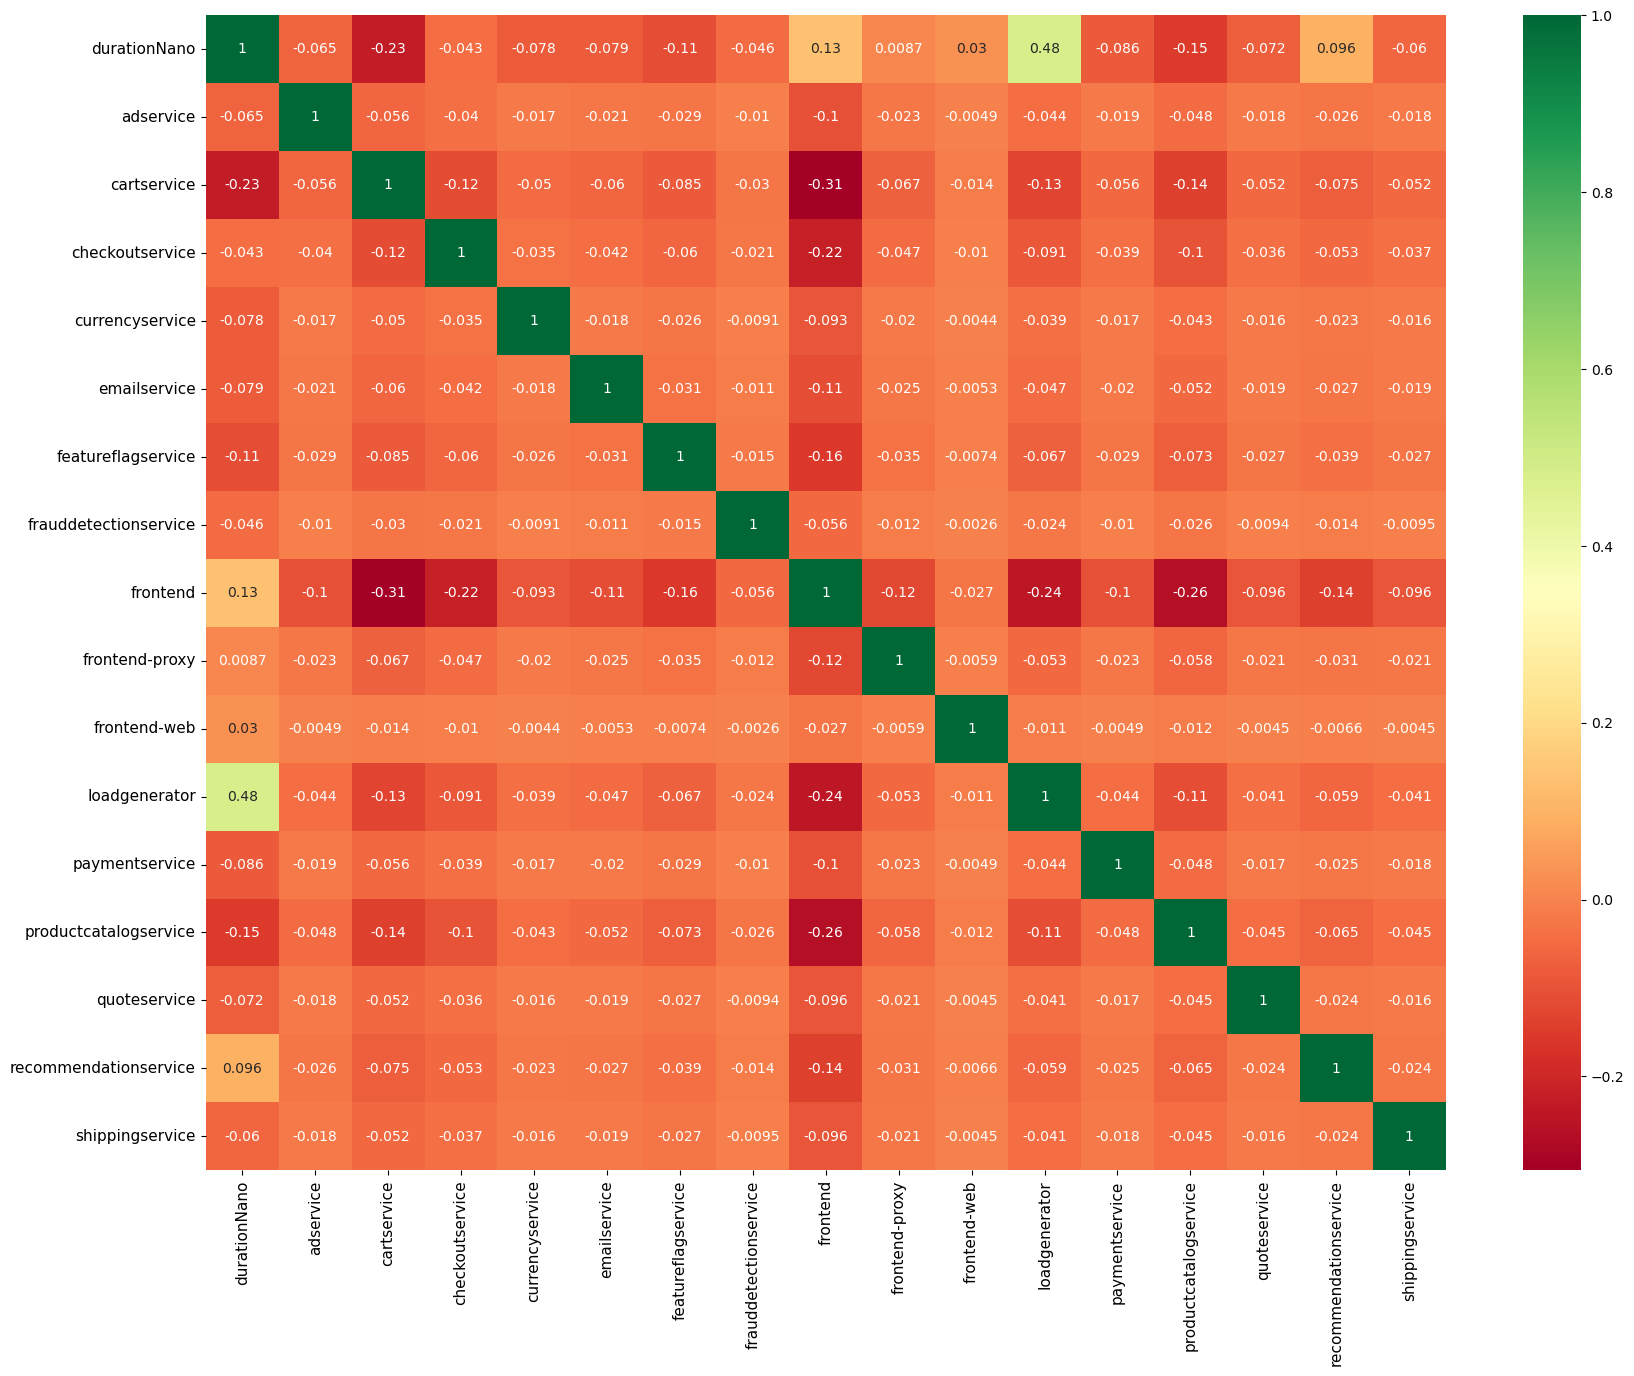

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(data1.corr(), annot=True, cmap="RdYlGn")
plt.tick_params(labelsize=11)

###### Insights from the heatmap
- We have to drop the column if the independent columns are highly related but we don't have any.
- We see that there are few cells which shows high correlation but thats between independent and dependent columns.

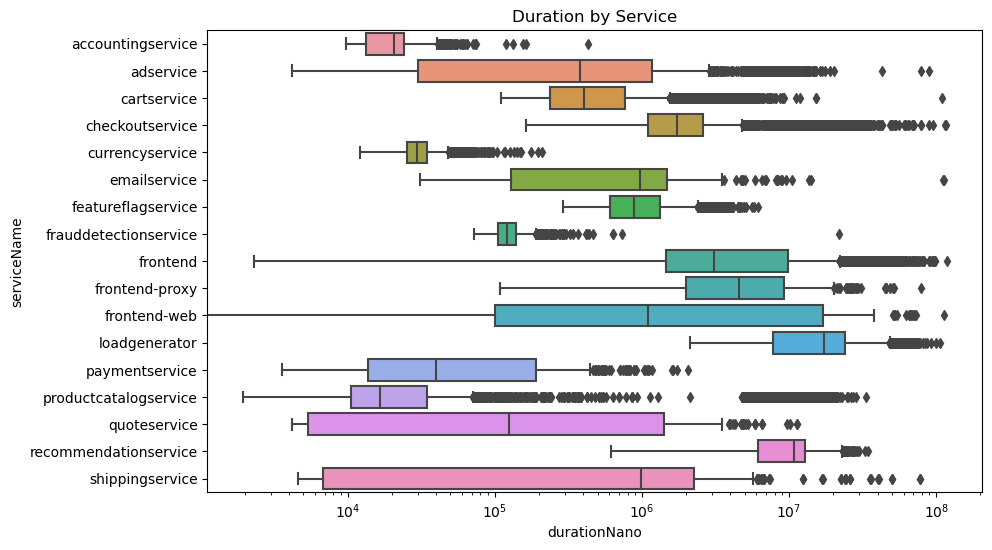

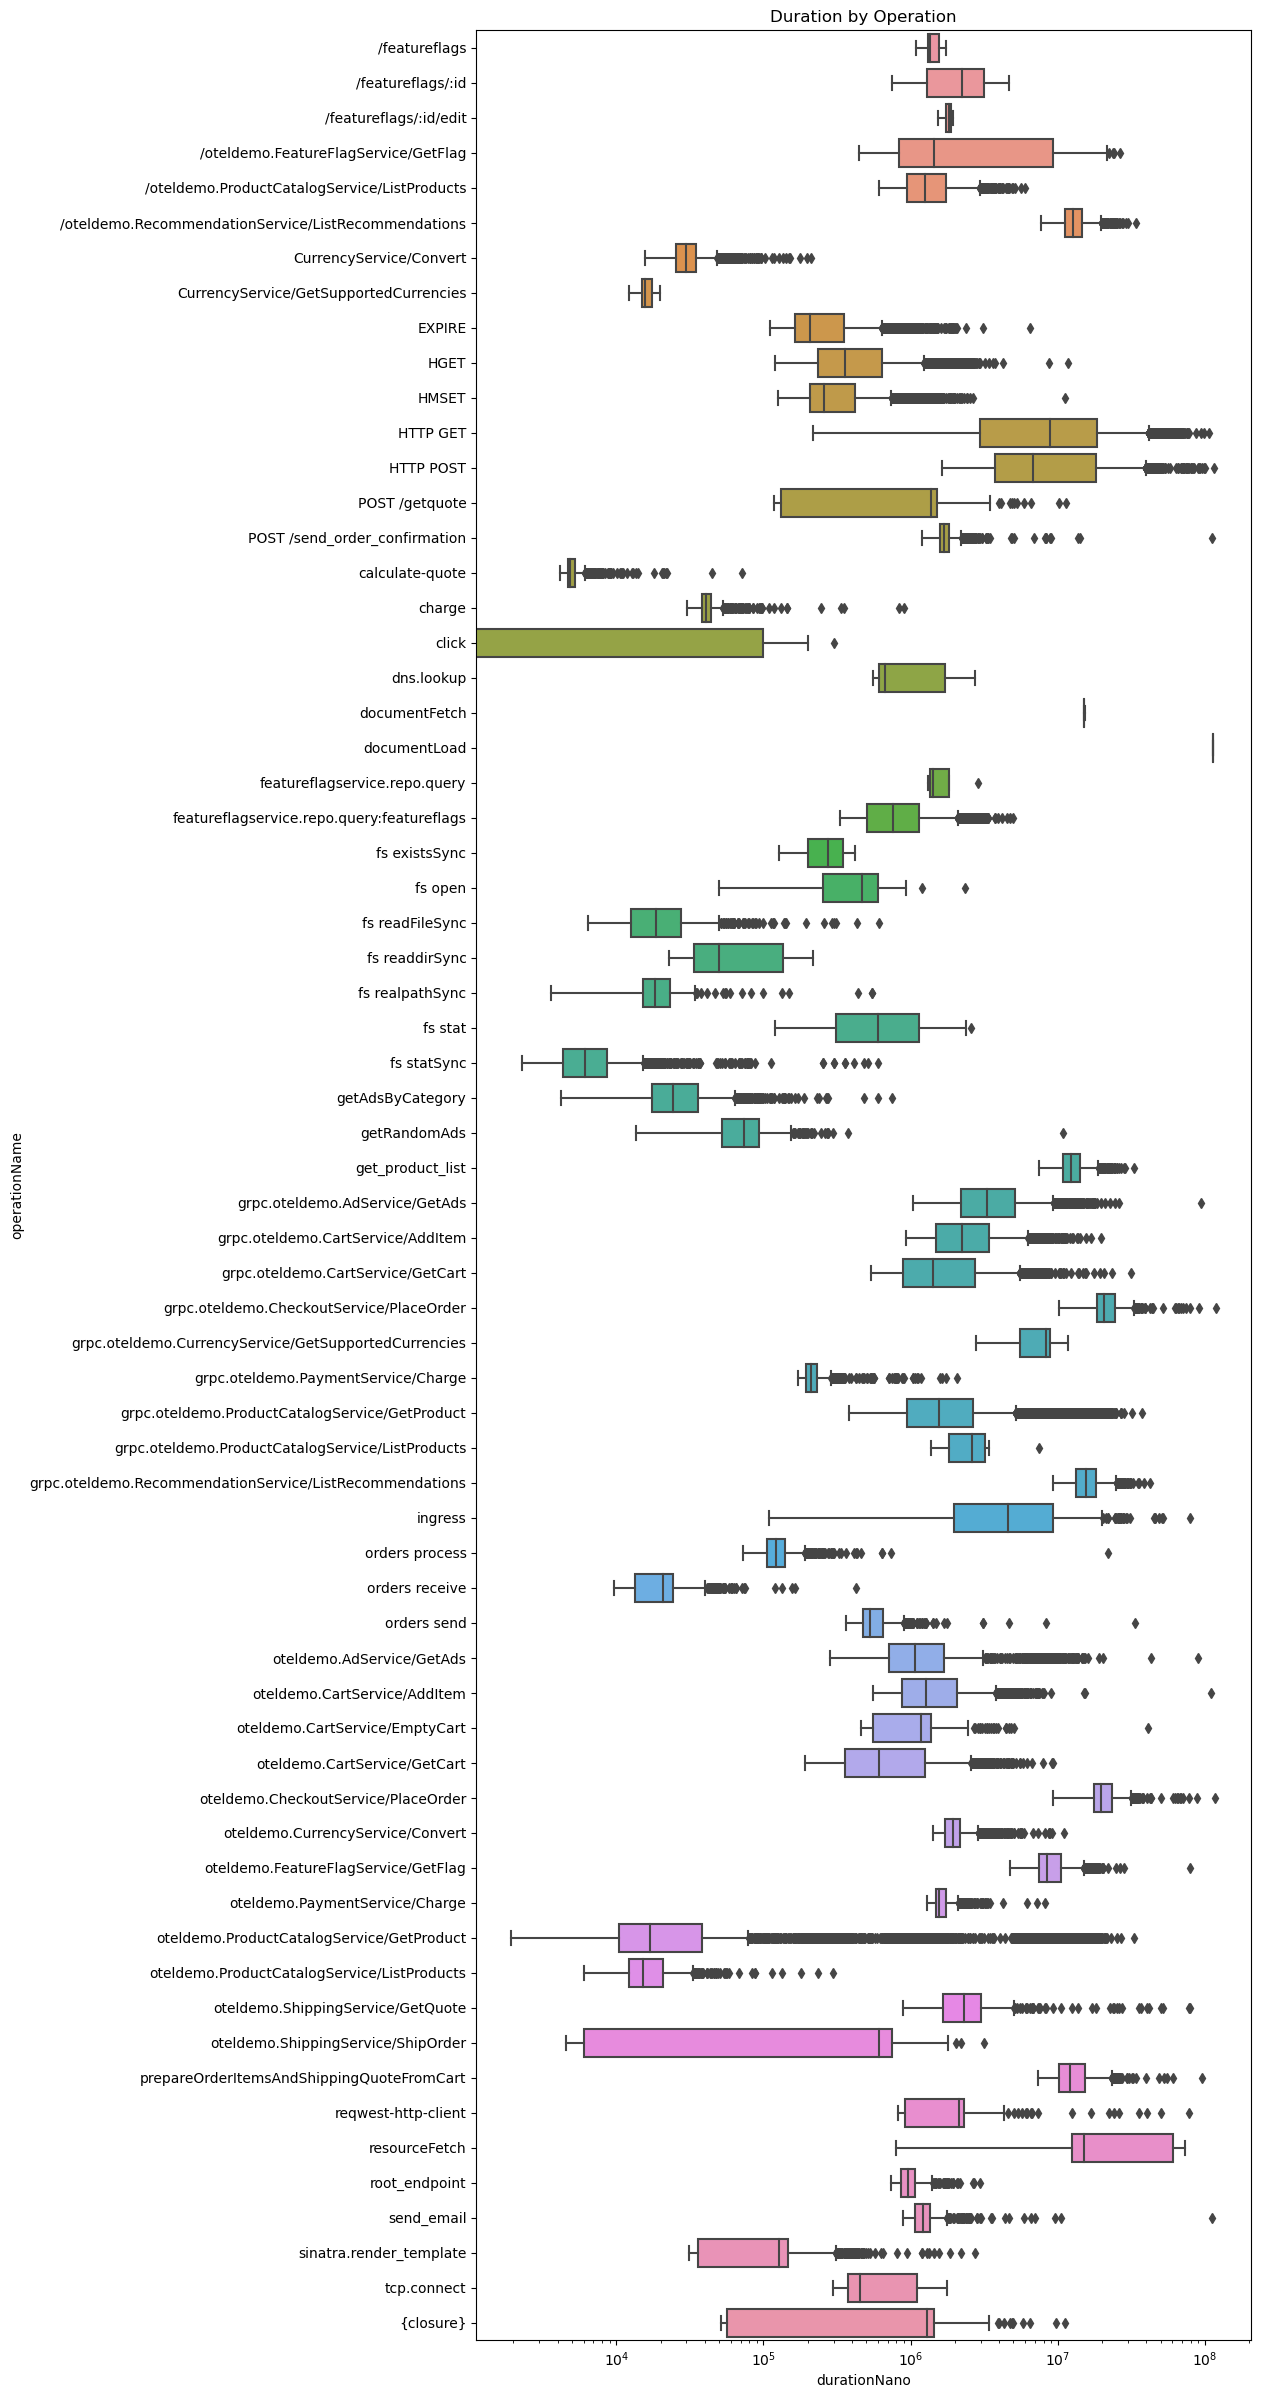

In [53]:
# Box plot to visualize the relationship between duration and Service name
# Duration by Service Name
plt.figure(figsize=(10, 6))
sns.boxplot(x='durationNano', y='serviceName', data=df)
plt.xscale('log')
plt.title('Duration by Service')
plt.show()

# Box plot to visualize the relationship between duration and operation name
# Duration by Operation Name
plt.figure(figsize=(10, 30))
sns.boxplot(x='durationNano', y='operationName', data=df)
plt.xscale('log')
plt.title('Duration by Operation')
plt.show()

##### Insights:
Based on the above plots, we conclude that:
- Overall, the box plot provides a clear visual summary of the distribution and variability of durationNano across different - -- serviceName categories and Operation Name categories, highlighting areas for potential performance improvements or further investigation.

In [54]:
# Identify Outlier using Z-score method and IQR method
# Z-score method
def detect_outliers_zscore(df):
    threshold = 3  # Threshold for z-score method
    mean = np.mean(df)
    std_dev = np.std(df)
    z_scores = [(x - mean) / std_dev for x in df]
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Interquartile range (IQR) method
def detect_outliers_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.where((df < lower_bound) | (df > upper_bound))[0]
    return outliers

# Assuming 'durationNano' is the column in your DataFrame
# You can replace 'df' with the name of your DataFrame

# Detect outliers using z-score method
outliers_zscore = detect_outliers_zscore(df['durationNano'])

# Detect outliers using interquartile range (IQR) method
outliers_iqr = detect_outliers_iqr(df['durationNano'])

print("Outliers using Z-score method:", outliers_zscore)
print("Outliers using IQR method:", outliers_iqr)


Outliers using Z-score method: [  3608   3610   3617 ... 181627 181705 181768]
Outliers using IQR method: [  3603   3608   3610 ... 181735 181757 181768]


In [55]:
# Remove outliers detected using z-score method
df_cleaned_zscore = df.drop(df.index[outliers_zscore])

# Remove outliers detected using interquartile range (IQR) method
df_cleaned_iqr = df.drop(df.index[outliers_iqr])

# If you want to remove outliers detected by both methods, you can take the intersection of the outlier indices
outliers_common = set(outliers_zscore).intersection(outliers_iqr)
df_cleaned_common = df.drop(df.index[list(outliers_common)])

# Print the shape of the cleaned DataFrame to check the number of rows after removing outliers
print("Shape of DataFrame after removing outliers (Z-score method):", df_cleaned_zscore.shape)
print("Shape of DataFrame after removing outliers (IQR method):", df_cleaned_iqr.shape)
print("Shape of DataFrame after removing outliers (Common outliers):", df_cleaned_common.shape)


Shape of DataFrame after removing outliers (Z-score method): (178118, 7)
Shape of DataFrame after removing outliers (IQR method): (163617, 7)
Shape of DataFrame after removing outliers (Common outliers): (178118, 7)


In [56]:
# Print the DataFrame without outliers detected using z-score method
print("DataFrame without outliers (Z-score method):")
print(df_cleaned_zscore)

# Print the DataFrame without outliers detected using interquartile range (IQR) method
print("DataFrame without outliers (IQR method):")
print(df_cleaned_iqr)

# Print the DataFrame without common outliers detected by both methods
print("DataFrame without common outliers:")
print(df_cleaned_common)

DataFrame without outliers (Z-score method):
       Timestamp                           traceID            spanID  \
0        42:32.7  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1        42:32.7  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2        42:33.9  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3        42:36.9  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4        42:39.9  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   
...          ...                               ...               ...   
183609   44:52.0  cc3f285a2ef094d4ba7582b1d5d47882  ebf0df7adc41ca4d   
183610   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  0975afe20d7368d2   
183611   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  96139b9d0d16639a   
183612   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  b1321d3db08e86d3   
183613   44:54.1  be4a70fee4913f3cf56b1c64228bcdb5  ae64d281880bfed7   

            parentSpanID            serviceName  \
0                   root     featurefla

#  #2. Algorithms to find anomalies in the duration of a span

Identifying outliers or anomalies in the dataset is very crucial step in data analysis for better model building otherwise 
overfitting, imbalanced data, underfitting problems may arise which restricts the performance of a model prediction. Model can't 
be trained properly and results inaccurate prediction.

#### Algorithms to find Anomalies
Statistical methods include -   **Z-Score and Inter-Quartile Range methods for numerical dataset**
\
This could work for trace microservice dataset as we are considering duration of a span which is a numerical column. It becomes eaasy to find the median, mean and mode for the algorithm and make conclusion on the outliers.
\
We can also use some other techniques called **Local Outlier Factor Algorithm** for Trace Microservice dataset.

## Conclusion:

**Inter-Quartile Range** or **Z-Score** would be a better choice for identifying the Outlier's and **Box-plot** for visualization.

and **Time-Series Anomaly Detection** (ex: **LSTM**, **ARIMA**, **SARIMA)**